In [1]:
import numpy as np
import pandas as pd

In [2]:
# https://www.statsmodels.org/stable/index.html
import statsmodels.api as sm

In [3]:
# Download Dataset from https://www.dropbox.com/scl/fi/v7c1c8a3cnncuv1fo28es/Wages.xlsx?rlkey=vli12nwph687hvn9jskgf73a1&st=s862pfm6&dl=1
# and add it to colab

In [4]:
# wagesDf = pd.read_excel("./Wages.xlsx")
wagesDf = pd.read_excel("https://www.dropbox.com/scl/fi/v7c1c8a3cnncuv1fo28es/Wages.xlsx?rlkey=vli12nwph687hvn9jskgf73a1&st=s862pfm6&dl=1")

In [6]:
wagesDf.head()

,Wage,Educ,Age
0,17.54,12,76
1,20.93,10,61
2,12.94,8,75
3,19.34,6,38
4,24.12,12,59


In [7]:
wagesDf.size

240

In [8]:
wagesDf.describe()

,Wage,Educ,Age
count,80.000000,80.000000,80.000000
mean,24.930500,13.850000,49.487500
std,7.479982,4.016107,17.213473
min,6.930000,6.000000,18.000000
25%,19.145000,10.000000,34.750000
50%,24.980000,14.000000,51.000000
75%,30.572500,17.000000,65.250000
max,43.440000,22.000000,77.000000


In [9]:
wagesDf.shape

(80, 3)

In [10]:
import matplotlib.pyplot as plt

In [11]:
# Plotting
fig1 = plt.figure(
  figsize=(8, 8)
)

<Figure size 800x800 with 0 Axes>

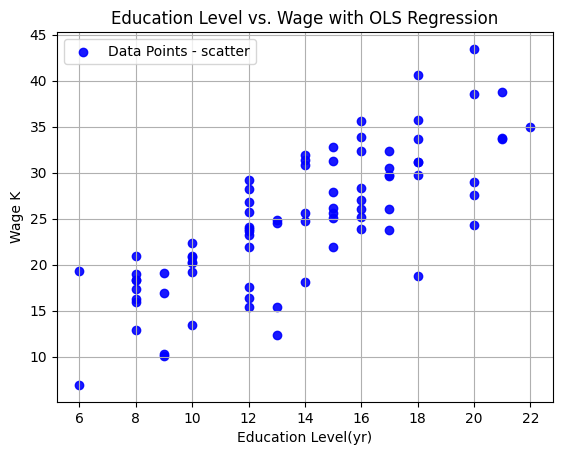

In [12]:
plt.scatter(
  wagesDf["Educ"],
  wagesDf["Wage"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)


plt.title('Education Level vs. Wage with OLS Regression')
plt.xlabel('Education Level(yr)')
plt.ylabel('Wage K')
plt.legend()
plt.grid(True)



plt.show()

In [16]:
wageEduModel = sm.OLS(
  wagesDf["Wage"],
  sm.add_constant(wagesDf["Educ"])
)
wageEduModelFit = wageEduModel.fit()
print(wageEduModelFit.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     120.4
Date:                Sun, 16 Jun 2024   Prob (F-statistic):           1.75e-17
Time:                        01:57:00   Log-Likelihood:                -236.64
No. Observations:                  80   AIC:                             477.3
Df Residuals:                      78   BIC:                             482.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8341      1.906      2.537      0.0

In [18]:
predictedWage1 = wageEduModelFit.predict(sm.add_constant(wagesDf["Educ"]))
wagesDf['predictedWage1'] = predictedWage1
wagesDf

,Wage,Educ,Age,predictedWage1
0,17.54,12,76,22.246147
1,20.93,10,61,19.344145
2,12.94,8,75,16.442142
3,19.34,6,38,13.540139
4,24.12,12,59,22.246147
...,...,...,...,...
75,25.64,14,74,25.148150
76,38.77,21,41,35.305160
77,21.87,15,75,26.599152
78,27.54,20,46,33.854159


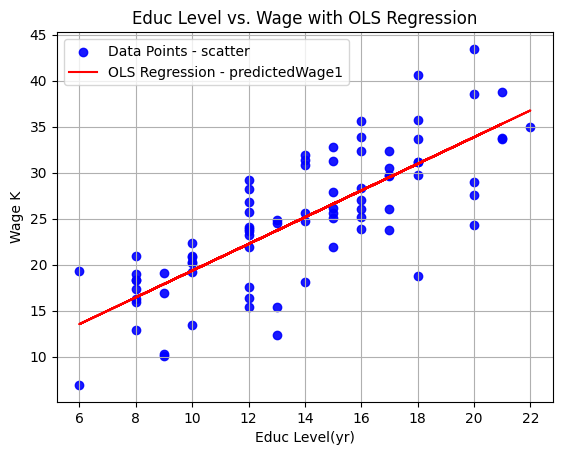

In [19]:


plt.scatter(
  wagesDf["Educ"],
  wagesDf["Wage"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)

plt.plot(
  wagesDf["Educ"],
  wagesDf["predictedWage1"],
  color='red',
  label='OLS Regression - predictedWage1'
)
plt.title('Educ Level vs. Wage with OLS Regression')
plt.xlabel('Educ Level(yr)')
plt.ylabel('Wage K')
plt.legend()
plt.grid(True)


plt.show()

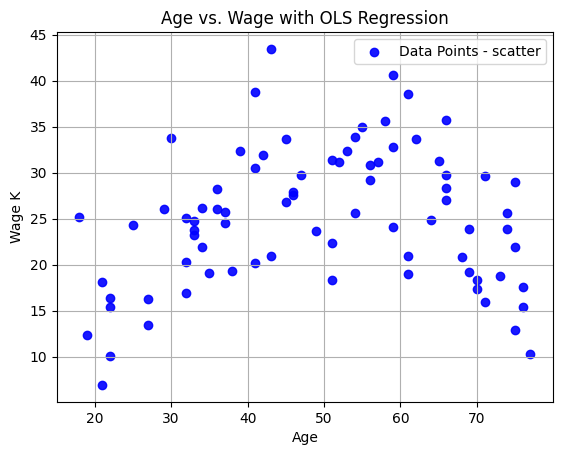

In [20]:
plt.scatter(
  wagesDf["Age"],
  wagesDf["Wage"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)


plt.title('Age vs. Wage with OLS Regression')
plt.xlabel('Age')
plt.ylabel('Wage K')
plt.legend()
plt.grid(True)



plt.show()

In [57]:
wageAgeModel = sm.OLS(
  wagesDf["Wage"],
  sm.add_constant(wagesDf["Age"])
)
wageAgeModelFit = wageAgeModel.fit()
print(wageAgeModelFit.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.718
Date:                Sun, 16 Jun 2024   Prob (F-statistic):              0.194
Time:                        02:08:06   Log-Likelihood:                -273.12
No. Observations:                  80   AIC:                             550.2
Df Residuals:                      78   BIC:                             555.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.7740      2.548      8.544      0.0

In [58]:
predictedWage2 = wageAgeModelFit.predict(sm.add_constant(wagesDf["Age"]))
wagesDf['predictedWage2'] = predictedWage2
wagesDf

,Wage,Educ,Age,predictedWage1,predictedWage2,predictedWage3
0,17.54,12,76,22.246147,26.621568,17.979211
1,20.93,10,61,19.344145,25.664811,22.597487
2,12.94,8,75,16.442142,26.557784,13.624960
3,19.34,6,38,13.540139,24.197784,16.865262
4,24.12,12,59,22.246147,25.537243,25.602624
...,...,...,...,...,...,...
75,25.64,14,74,25.148150,26.494001,21.783654
76,38.77,21,41,35.305160,24.389135,36.567393
77,21.87,15,75,26.599152,26.557784,22.402672
78,27.54,20,46,33.854159,24.708054,36.268476


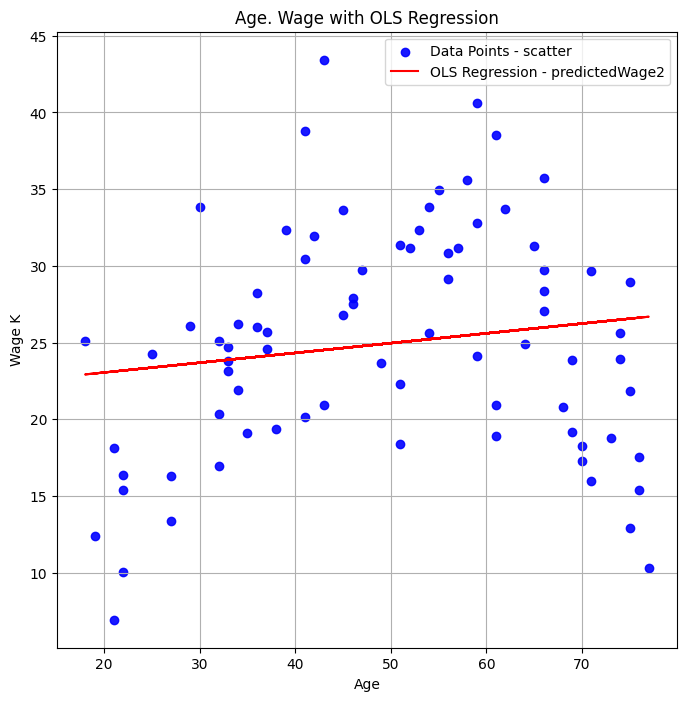

In [59]:
# Plotting
plt.figure(
  figsize=(8, 8)
)

plt.scatter(
  wagesDf["Age"],
  wagesDf["Wage"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)

plt.plot(
  wagesDf["Age"],
  wagesDf["predictedWage2"],
  color='red',
  label='OLS Regression - predictedWage2'
)
plt.title('Age. Wage with OLS Regression')
plt.xlabel('Age')
plt.ylabel('Wage K')
plt.legend()
plt.grid(True)



plt.show()

In [60]:
def transformWithAgePower2(df):
    df = df.copy()
    df['agePower2'] = df.apply(lambda row: row['Age'] * row["Age"], axis=1)
    df.insert(0, 'const', 1)
    
    return df

In [61]:
newFd = transformWithAgePower2(wagesDf[["Educ", "Age"]])
newFd.head()

,const,Educ,Age,agePower2
0,1,12,76,5776
1,1,10,61,3721
2,1,8,75,5625
3,1,6,38,1444
4,1,12,59,3481


In [62]:
wageEducAgePower2Model = sm.OLS(
  wagesDf["Wage"],
  transformWithAgePower2(wagesDf[["Educ", "Age"]])
)
wageEducAgePower2ModelFit = wageEducAgePower2Model.fit()
print(wageEducAgePower2ModelFit.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     125.7
Date:                Sun, 16 Jun 2024   Prob (F-statistic):           2.18e-29
Time:                        02:08:20   Log-Likelihood:                -202.56
No. Observations:                  80   AIC:                             413.1
Df Residuals:                      76   BIC:                             422.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.7219      3.023     -7.517      0.0

In [63]:
predictedWage3 = wageEducAgePower2ModelFit.predict(transformWithAgePower2(wagesDf[["Educ", "Age"]]))
wagesDf['predictedWage3'] = predictedWage3
wagesDf

,Wage,Educ,Age,predictedWage1,predictedWage2,predictedWage3
0,17.54,12,76,22.246147,26.621568,17.979211
1,20.93,10,61,19.344145,25.664811,22.597487
2,12.94,8,75,16.442142,26.557784,13.624960
3,19.34,6,38,13.540139,24.197784,16.865262
4,24.12,12,59,22.246147,25.537243,25.602624
...,...,...,...,...,...,...
75,25.64,14,74,25.148150,26.494001,21.783654
76,38.77,21,41,35.305160,24.389135,36.567393
77,21.87,15,75,26.599152,26.557784,22.402672
78,27.54,20,46,33.854159,24.708054,36.268476


In [68]:
from mlModelSaver import MlModelSaver
mlModelSaverInstance = MlModelSaver({
    "baseRelativePath": "..",
    "modelsFolder": "models"
})

loadedModel = mlModelSaverInstance.exportModel(
    wageEducAgePower2ModelFit,
    {
        "modelName": "wageEducAgePower2ModelFit",
        "description": "wageEducAgePower2ModelFit",
        "modelType": "sm.OLS",
        "inputs": [
            {
                "name": "Educ",
                "type": "int",
            },
            {
                "name": "Age",
                "type": "int"
            }
        ],
        "transformer": transformWithAgePower2,
        "outputs": [
            {
                "name": "Wage",
                "type": "float"
            }
        ]
    }
)
loadedModel

In [69]:

testData = [{
    'Educ': 12,
    'Age': 76
}]

# Create a DataFrame from the dictionary
testDf = pd.DataFrame(testData)


In [70]:
wageEducAgePower2ModelFit.predict( transformWithAgePower2(testDf))

0    17.979211
dtype: float64

In [71]:
loadedModel.mlModelSavePredict(testDf)

[{'Wage': 17.97921107531436}]